In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "/Users/shuashua/Documents/Data_Analytic_Boot_Camp/Homework5a/05_matplotlib_homework_Instructions_Pyber_data_city_data.csv"
ride_data_to_load = "/Users/shuashua/Documents/Data_Analytic_Boot_Camp/Homework5a/05_matplotlib_homework_Instructions_Pyber_data_ride_data.csv"

# Read the City and Ride Data
c = pd.read_csv(city_data_to_load)
r = pd.read_csv(ride_data_to_load)

#print(c.head())
#print(r.head())

# Combine the data into a single dataset
rc = pd.merge(r,c,on='city',how='left')
rc
# Display the data table for preview
rc.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
grp = rc.groupby(['city','type'], as_index=False)
driver = grp.sum()
fare = grp.mean()
ride = grp.count()

df = driver[['city','driver_count','type']]
df['fare'] = fare['fare']
df['ride'] = ride['ride_id']

df

C:\Users\shuashua\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,city,driver_count,type,fare,ride
0,Amandaburgh,216,Urban,24.641667,18
1,Barajasview,572,Urban,25.332273,22
2,Barronchester,176,Suburban,36.422500,16
3,Bethanyland,396,Suburban,32.956111,18
4,Bradshawfurt,70,Rural,40.064000,10
5,Brandonfort,190,Suburban,35.437368,19
6,Carriemouth,1404,Urban,28.314444,27
7,Christopherfurt,1107,Urban,24.501852,27
8,Colemanland,506,Suburban,30.894545,22
9,Davidfurt,391,Suburban,31.995882,17


## Bubble Plot of Ride Sharing Data

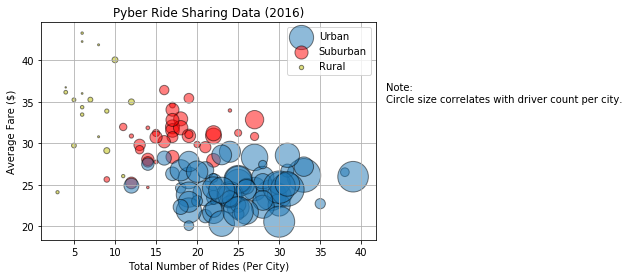

<Figure size 432x288 with 0 Axes>

In [6]:
# Obtain the x and y coordinates for each of the three city types
urban_x = df.loc[df['type']=='Urban']['ride']
urban_y = df.loc[df['type']=='Urban']['fare']
urban_s = df.loc[df['type']=='Urban']['driver_count']

suburban_x = df.loc[df['type']=='Suburban']['ride']
suburban_y = df.loc[df['type']=='Suburban']['fare']
suburban_s = df.loc[df['type']=='Suburban']['driver_count']

rural_x = df.loc[df['type']=='Rural']['ride']
rural_y = df.loc[df['type']=='Rural']['fare']
rural_s = df.loc[df['type']=='Rural']['driver_count']

# Build the scatter plots for each city types
s = plt.scatter(x=suburban_x, y=suburban_y, s=suburban_s*.5, marker='o', label='Suburban', edgecolors='black', c='red', alpha=.5)
u = plt.scatter(x=urban_x, y=urban_y, s=urban_s*.5, marker='o', edgecolors='black', label='Urban', alpha=.5)
r = plt.scatter(x=rural_x, y=rural_y, s=rural_s*.5, marker='o', edgecolors='black', label='Rural', c='y', alpha=.5)

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel('Average Fare ($)')
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
plt.legend(handles=[u, s, r])
plt.text(43, 35, "Note:\nCircle size correlates with driver count per city.")

# Incorporate a text label regarding circle size
plt.show()

# Save Figure
plt.savefig('/Users/shuashua/Documents/Data_Analytic_Boot_Camp/Homework5a/Pyber_Ride_Share_Data.png')

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

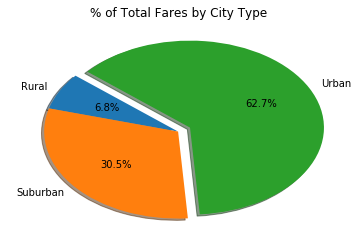

In [5]:
# Calculate Type Percents
fgrp = rc.groupby('type', as_index=False).sum()
fpercent = fgrp['fare']*100 / sum(fgrp['fare'])
fpercent[0]

explode = (0,0,0.1)
#colors=['yellow','blue','red']
labels=fgrp['type']

# Build Pie Chart
plt.pie(fpercent,labels=labels,explode=explode,shadow=True,autopct="%1.1f%%",startangle=140)
plt.title('% of Total Fares by City Type')
#plt.axis("equal")

# Save Figure
plt.savefig('/Users/shuashua/Documents/Data_Analytic_Boot_Camp/Homework5a/Fare_Pie.png')

In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

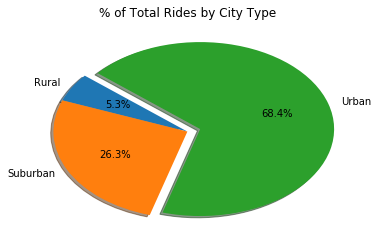

In [7]:
# Calculate Ride Percents
rgrp = rc.groupby('type', as_index=False).count()
rgrp

rpercent = rgrp['ride_id']*100/sum(rgrp['ride_id'])
rpercent

explode = (0,0,0.1)
#colors=['yellow','blue','red']
labels=rgrp['type']

# Build Pie Chart
plt.pie(rpercent,labels=labels,explode=explode,shadow=True,autopct="%1.1f%%",startangle=140)
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig('/Users/shuashua/Documents/Data_Analytic_Boot_Camp/Homework5a/Ride_Pie.png')

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [9]:
dgrp = rc.groupby('type', as_index=False).sum()
dgrp

dpercent = (dgrp['driver_count']/sum(dgrp['driver_count']))*100
dpercent

0     0.781557
1    12.472893
2    86.745550
Name: driver_count, dtype: float64

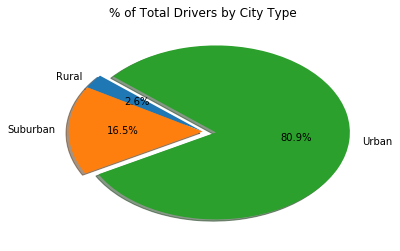

In [9]:
# Calculate Driver Percents
dgrp = c.groupby('type', as_index=False).sum()
dgrp

dpercent = (dgrp['driver_count']/sum(c['driver_count']))
dpercent

explode = (0,0,0.1)
#colors=['yellow','blue','red']
labels=dgrp['type']

# Build Pie Chart
plt.pie(dpercent,labels=labels,explode=explode,shadow=True,autopct="%1.1f%%",startangle=140)
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig('/Users/shuashua/Documents/Data_Analytic_Boot_Camp/Homework5a/Driver_Pie.png')

In [7]:
100 * rc.groupby(["type"]).sum()["driver_count"] / rc["driver_count"].sum()

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64